In [1]:
# Dataset link : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
heart = pd.read_csv('heart.csv')

In [179]:
heart.shape

(303, 14)

In [180]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [181]:
sat = pd.read_csv('o2Saturation.csv')

In [182]:
sat.shape

(3585, 1)

In [183]:
sat.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [184]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [185]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [186]:
heart.drop_duplicates(keep = 'first', inplace = True)

In [187]:
heart.shape

(302, 14)

In [188]:
df = heart

<AxesSubplot:>

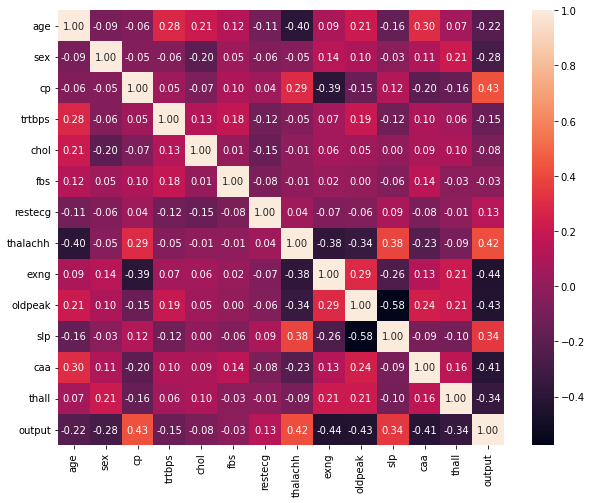

In [189]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f')

# EDA

### Age

<AxesSubplot:xlabel='age', ylabel='Count'>

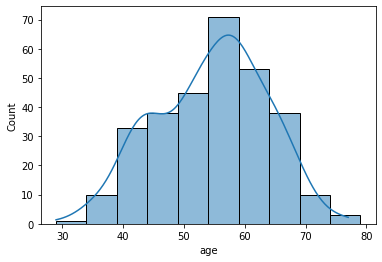

In [190]:
sns.histplot(df['age'], kde=True, binwidth=5)

<AxesSubplot:xlabel='age', ylabel='count'>

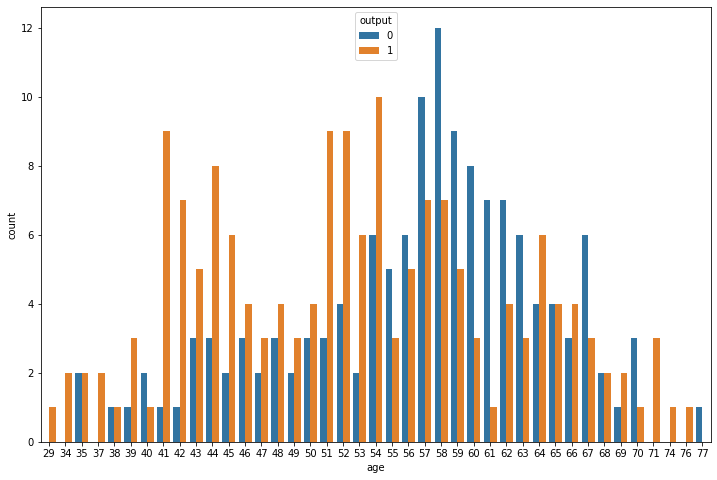

In [191]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data = df, hue = 'output')

- People of age 41-55 has more chance of getting heart attack
- After that chances of getting heart attack is reduced

### Gender(sex)

<AxesSubplot:xlabel='output', ylabel='count'>

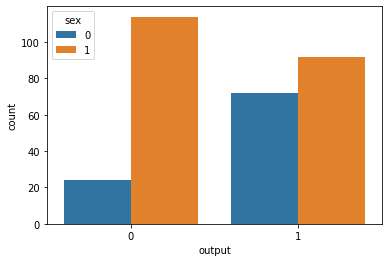

In [192]:
sns.countplot(x = 'output', data = df, hue = 'sex')

* Male are getting much more heart attack than female
* There is around 10% diffrence in between the male and female ration

### Chest Pain type

<AxesSubplot:xlabel='cp', ylabel='output'>

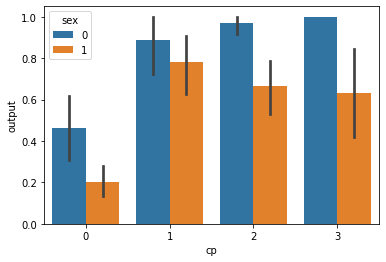

In [193]:
sns.barplot(x = 'cp', y = 'output', data = df, hue = 'sex')

* If chest pain is of type 0 then they have very little chance of getting heart attak.
* But type 1 has much more chance of followed by 2 and 3
* Female are mostly getting heart attack if she is having any kind of chest pain

### Blood Pressure

In [194]:
# trtbps

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


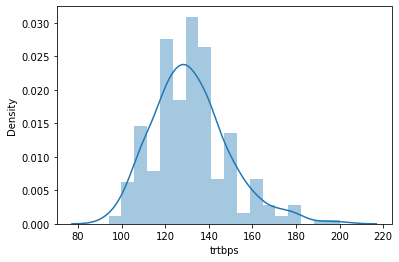

In [195]:
sns.distplot(df['trtbps'], kde = True);

<AxesSubplot:xlabel='trtbps', ylabel='Count'>

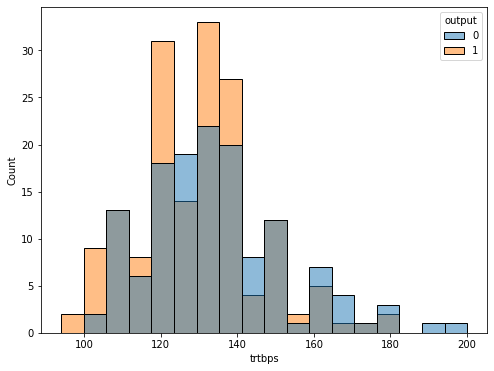

In [196]:
plt.figure(figsize=(8, 6))
sns.histplot(x = 'trtbps', data = df, hue = 'output')

* Normal: Below 120
* Elevated: 120-129
* Stage 1 high blood pressure (also called hypertension): 130-139
* Stage 2 hypertension: 140 or more
* Hypertensive crisis: 180 or more.

* *Mostly people is getting heart attack if they in elevated of stage 1*
* Maximum chance is in hypertennsion state

### cholestoral 

In [197]:
# chol

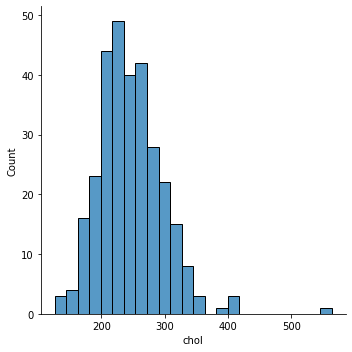

In [198]:
sns.displot(df['chol'])

* If cholestoral value is more than 240 then person is in danger

In [199]:
df = df[df['chol'] < 370]

### Maximum heart achieved

<AxesSubplot:xlabel='thalachh', ylabel='output'>

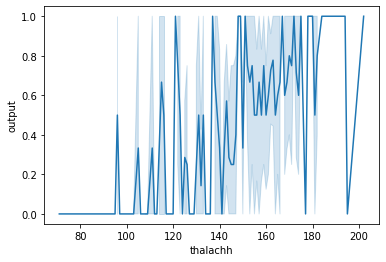

In [200]:
sns.lineplot(x = 'thalachh', y = 'output', data = df)

In [284]:
correlation = df.corr()['output'].drop('output')
abs_corr = correlation.abs()
abs_corr

age         0.231584
sex         0.288353
cp          0.428845
trtbps      0.143787
chol        0.112667
fbs         0.035228
restecg     0.139110
thalachh    0.421106
exng        0.432968
oldpeak     0.427227
slp         0.344538
caa         0.401227
thall       0.340503
Name: output, dtype: float64

In [311]:
top_corr = abs_corr[abs_corr > 0.10]

In [312]:
top_corr

age         0.231584
sex         0.288353
cp          0.428845
trtbps      0.143787
chol        0.112667
restecg     0.139110
thalachh    0.421106
exng        0.432968
oldpeak     0.427227
slp         0.344538
caa         0.401227
thall       0.340503
Name: output, dtype: float64

In [313]:
new_df = df[top_corr.index]

In [314]:
new_df.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2


In [315]:
X = new_df
y = df['output']

In [316]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [343]:
lr = LogisticRegression()
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
lr.fit(X_train_scaled, y_train)
pred = lr.predict(X_test_scaled)
print("Accuracy score : ", accuracy_score(y_test, pred))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

Accuracy score :  0.8666666666666667
[[23  3]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.91      0.85      0.88        34

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [344]:
dt = DecisionTreeClassifier(ccp_alpha=0.01, max_features=2)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, pred))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

Accuracy score :  0.8166666666666667
[[26  9]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        35
           1       0.72      0.92      0.81        25

    accuracy                           0.82        60
   macro avg       0.82      0.83      0.82        60
weighted avg       0.84      0.82      0.82        60



In [345]:
rf = RandomForestClassifier(ccp_alpha=0.001)
rf.fit(X_train_scaled, y_train)
pred = rf.predict(X_test_scaled)
print("Accuracy score : ", accuracy_score(y_test, pred))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

Accuracy score :  0.8833333333333333
[[24  3]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.89        33

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [348]:
svc = SVC()
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
svc.fit(X_train_scaled, y_train)
pred = svc.predict(X_test_scaled)
print("Accuracy score on train data : ", accuracy_score(y_train, svc.predict(X_train_scaled)))
print("Accuracy score on test data : ", accuracy_score(y_test, pred))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

Accuracy score on train data :  0.8818565400843882
Accuracy score on test data :  0.9
[[25  3]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.91      0.91      0.91        32

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [349]:
## Model is best fitted

In [350]:
## Feature used are :
top_corr.index

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')